Goal:
Explore the Healthcare-dataset-stroke-data, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
1. Why This Project?
- Learn data cleaning with Pandas.

- Use NumPy for calculations (mean, median, etc.).

- Visualize trends using Matplotlib and Seaborn.

- Understand the relationship between  features 


2.import libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


3 Load datset

In [14]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


4.Exploring the Data

In [15]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_marr

Insights:

1. The dataset contains 5110 records with multiple features such as age, gender, hypertension, heart disease, marital status, work type, residence type, average glucose level, BMI, smoking status, and stroke occurrence.

2. Missing values were present in the 'bmi' column, which have been filled with the mean value.

3. Initial exploration shows that age and average glucose level are more strongly associated with stroke occurrence, while BMI appears to be a weaker predictor.

4. Stroke rates vary by work type and smoking status, with self-employed individuals and former smokers showing higher stroke rates.

5. Understanding these patterns is crucial for effective data cleaning, feature selection, and further analysis.

In [16]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())


In [17]:
avg_age = df['age'].mean()
print("Average Age:", avg_age)

#stroke rate by smoking status
stroke_by_smoke=df.groupby("smoking_status")['stroke'].mean()
print("Stroke rate by Smoking ",stroke_by_smoke)


stroke_by_glucose=df.groupby("avg_glucose_level")['stroke'].mean()
print("Stroke rate by Glucose ",stroke_by_glucose)
  
stroke_by_worktype=df.groupby("work_type")['stroke'].mean()
print("Stroke rate by Work Type ",stroke_by_worktype)

stroke_by_bmi=df.groupby("bmi")['stroke'].mean()
print("Stroke rate by BMI ",stroke_by_bmi)

Average Age: 43.226614481409
Stroke rate by Smoking  smoking_status
Unknown            0.030440
formerly smoked    0.079096
never smoked       0.047569
smokes             0.053232
Name: stroke, dtype: float64
Stroke rate by Glucose  avg_glucose_level
55.12     0.0
55.22     0.0
55.23     0.0
55.25     0.0
55.26     0.0
         ... 
266.59    0.0
267.60    0.0
267.61    0.0
267.76    0.0
271.74    1.0
Name: stroke, Length: 3979, dtype: float64
Stroke rate by Work Type  work_type
Govt_job         0.050228
Never_worked     0.000000
Private          0.050940
Self-employed    0.079365
children         0.002911
Name: stroke, dtype: float64
Stroke rate by BMI  bmi
10.3    0.0
11.3    0.0
11.5    0.0
12.0    0.0
12.3    0.0
       ... 
66.8    0.0
71.9    0.0
78.0    0.0
92.0    0.0
97.6    0.0
Name: stroke, Length: 419, dtype: float64


### Insights:

1. Filling missing BMI values ensures that statistical analyses involving BMI are accurate and not biased by missing data.

2. Grouping by categorical variables like smoking status and work type allows us to identify patterns and associations with stroke occurrence.

3. Correlation analysis highlights that age and average glucose level are more strongly associated with stroke risk, while BMI and other features show weaker relationships.

6.Analysis with Numpys and Pandas


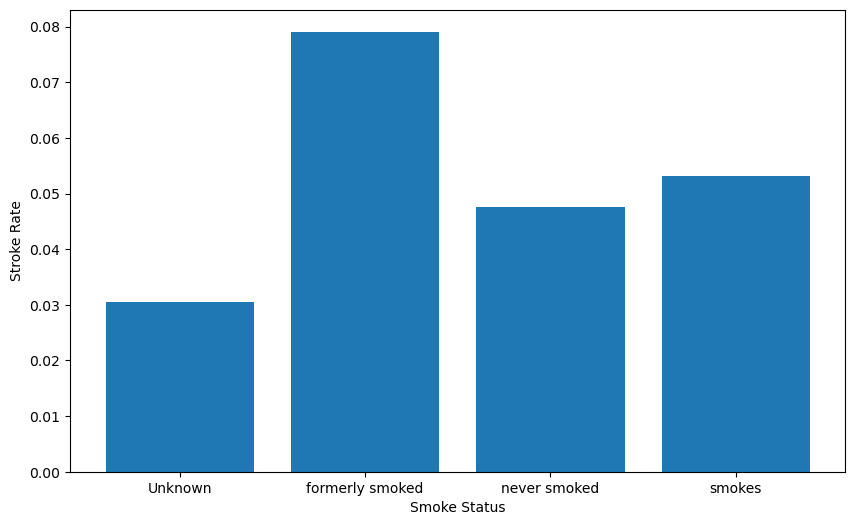

In [18]:
work = stroke_by_smoke.index
rate = stroke_by_smoke.values
plt.figure(figsize=(10,6))
plt.bar(work, rate, color='C0')
plt.xlabel('Smoke Status')
plt.ylabel('Stroke Rate')
plt.show()

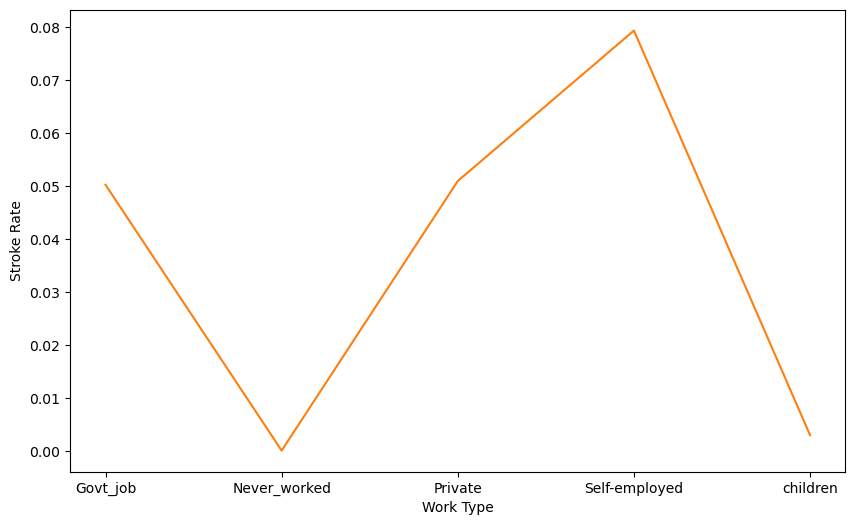

In [19]:
#Line plot of strokerate by work type
work = stroke_by_worktype.index
rate = stroke_by_worktype.values
plt.figure(figsize=(10,6))
plt.plot(work, rate, color='C1')
plt.xlabel('Work Type')
plt.ylabel('Stroke Rate')
plt.show()


The line plot of stroke rate by work type reveals several insights:

- **Self-employed individuals** have the highest stroke rate among all work types, suggesting a potential link between self-employment and increased stroke risk.
- **Private sector** and **government job** employees have similar stroke rates, both higher than children and those who never worked.
- **Children** and those who have **never worked** exhibit the lowest stroke rates, which is expected given their age and likely lower exposure to common stroke risk factors.
- The differences in stroke rates across work types may reflect variations in lifestyle, stress levels, access to healthcare, or other socioeconomic factors associated with each work category.

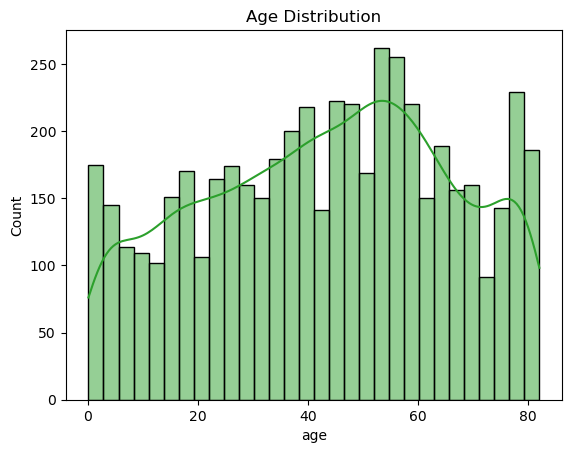

In [20]:
#Distribution of Age
sns.histplot(df['age'], bins=30, kde=True, color='C2')
plt.title("Age Distribution")
plt.show()

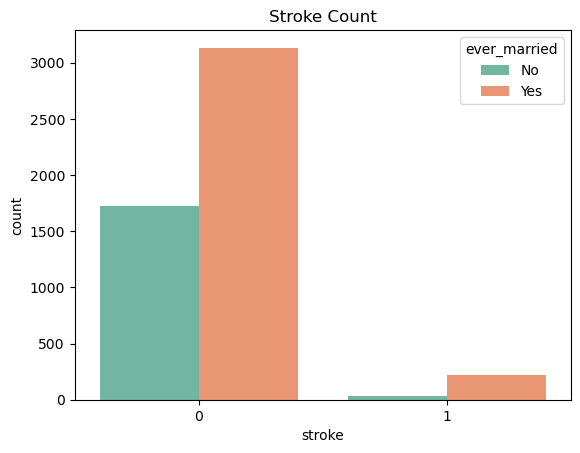

In [21]:
sns.countplot(x='stroke', hue='ever_married',data=df, palette='Set2')
plt.title("Stroke Count")
plt.show()

The countplot comparing stroke occurrence by marital status reveals:

- Individuals who have **ever been married** show a higher count of strokes compared to those who have never been married.
- For both stroke and non-stroke groups, the majority are from the "ever married" category, but the difference is more pronounced among stroke cases.
- This suggests a possible association between marital status and stroke occurrence, potentially due to age or lifestyle factors, as married individuals may generally be older.

Further analysis would be needed to determine if marital status is an independent risk factor or if it is confounded by age and other variables.

C:\Users\bsais\AppData\Local\Temp\ipykernel_4660\1782750544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='age', data=df, palette='Set3')


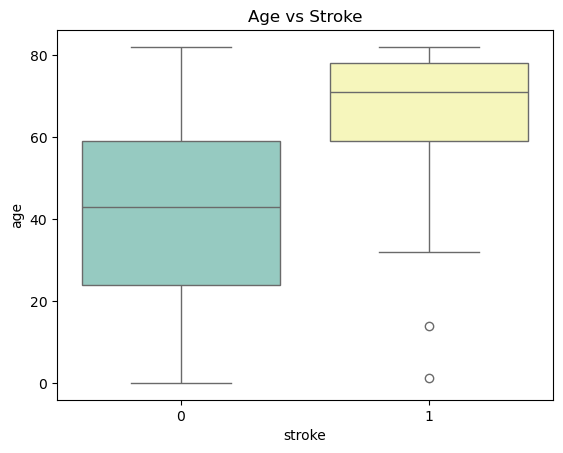

In [22]:
sns.boxplot(x='stroke', y='age', data=df, palette='Set3')
plt.title("Age vs Stroke")
plt.show()

The boxplot comparing age distributions for stroke and non-stroke groups shows:

- Individuals who experienced a stroke generally have a higher median age compared to those who did not.
- The age range (interquartile range) for stroke patients is also higher, indicating that strokes are more common among older individuals.
- This suggests that age is a significant risk factor for stroke in this dataset.

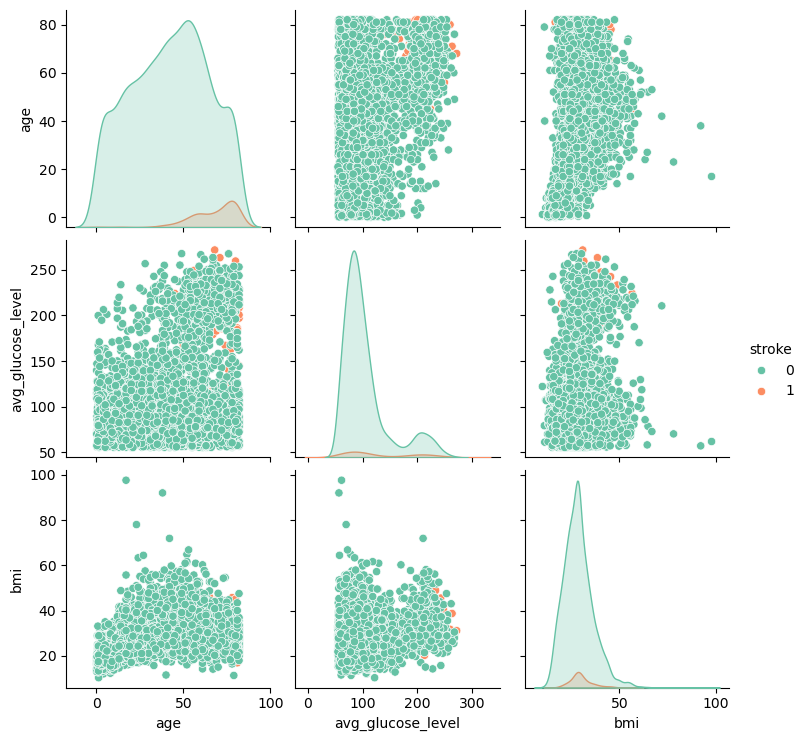

In [23]:
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke', palette='Set2')
plt.show()

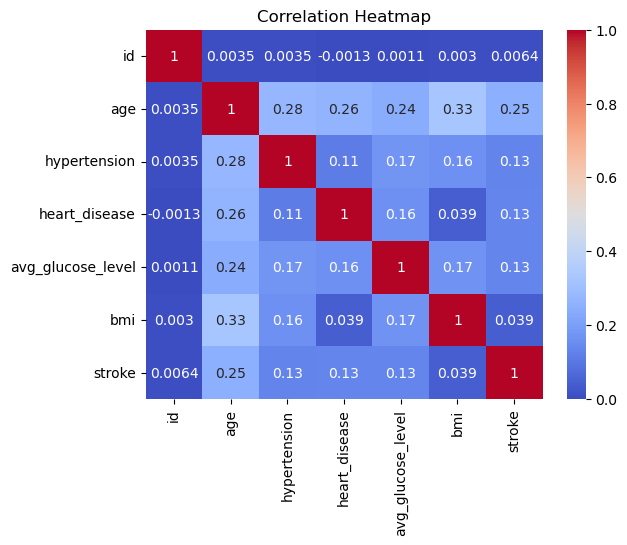

In [24]:
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The pair plot of `age`, `avg_glucose_level`, `bmi`, and `stroke` reveals several insights:

- **Age**: Individuals who experienced a stroke tend to be older, as indicated by the clustering of stroke cases at higher age values.
- **Average Glucose Level**: Stroke cases are more frequent among those with higher average glucose levels, suggesting a possible association between elevated glucose and stroke risk.
- **BMI**: There is no strong visible separation between stroke and non-stroke groups based on BMI alone, indicating BMI may not be a strong independent predictor in this dataset.
- **Relationships**: The scatter plots show that age and average glucose level together may help distinguish stroke cases, while BMI does not show a clear pattern.
- **Distribution**: The diagonal histograms confirm that stroke cases are skewed towards higher ages and glucose levels.

Overall, age and average glucose level appear to be more strongly associated with stroke occurrence than BMI in this dataset.